In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def MNIST_data(file_name,data_size):
    if file_name == 'train-images-idx3-ubyte.gz' or file_name == 't10k-images-idx3-ubyte.gz' :
        import gzip
        f = gzip.open(file_name, 'r')
        
        image_size = 28 * 28
        f.read(16)
        buf = f.read()
        data = np.frombuffer(buf, dtype = 'uint8').astype('f')
        data = data.reshape(data_size,784)
        return data
    elif file_name == 'train-labels-idx1-ubyte.gz' or file_name == 't10k-labels-idx1-ubyte.gz' :
        import gzip
        f = gzip.open(file_name, 'r')
        
        label_size = 1
        
        f.read(8)
        buf = f.read()
        data = np.frombuffer(buf, dtype = 'uint8').astype('f')
        data = data.reshape(data_size,1)
        return data
    else:
        print('Enter correct file name or data size')

In [3]:
X_train = MNIST_data('train-images-idx3-ubyte.gz',60000)
X_train.shape

(60000, 784)

In [4]:
y_train = MNIST_data('train-labels-idx1-ubyte.gz',60000).flatten()
y_train.shape

(60000,)

In [5]:
X_test = MNIST_data('t10k-images-idx3-ubyte.gz',10000)
X_test.shape

(10000, 784)

In [6]:
y_test = MNIST_data('t10k-labels-idx1-ubyte.gz',10000).flatten()
y_test.shape

(10000,)

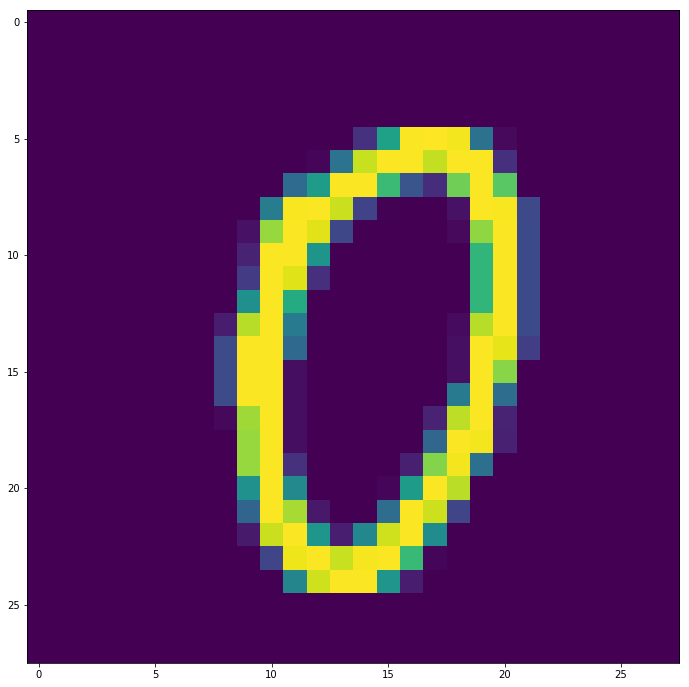

In [7]:
plt.figure(figsize=(15,12))
plt.imshow(X_train[1000].reshape(28,28));

In [8]:
y_train[1000]

0.0

# Shuffling of data

In [9]:
shuffling_index = np.random.permutation(60000)
shuffling_index

array([28602,  1907, 29927, ..., 39936, 57056, 16113])

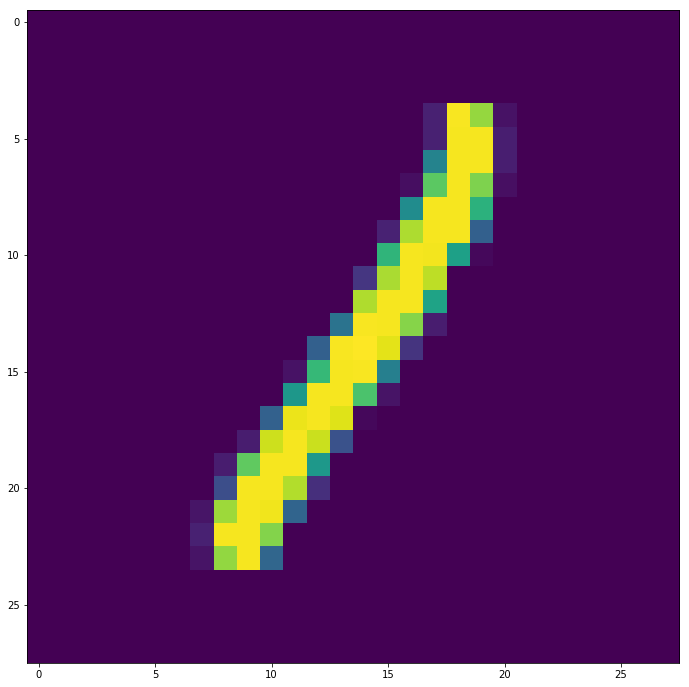

In [10]:
X_train = X_train[shuffling_index]
plt.figure(figsize=(15,12))
plt.imshow(X_train[1000].reshape(28,28));

In [11]:
y_train = y_train[shuffling_index]
y_train[1000]

1.0

# Feature Scalling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train.shape

(60000, 784)

In [15]:
X_test.shape

(10000, 784)

# To print Different Scores

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [29]:
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
    '''
    To Print the accuracy score, Precision and recall score with confusion metrcis
    '''
    global accuracy_scr, classification_report, confusion_matrix
        
    if train:
        '''
        Print the score of train datasets
        '''
        print("\n Report of {} \n".format(clf))
        print("\n @ Train datasets\n")
        
        accuracy_scr = accuracy_score(y_train, clf.predict(X_train))
        classification_report = classification_report(y_train, clf.predict(X_train))
        confusion_matrix = confusion_matrix(y_train, clf.predict(X_train))
        
        print("Accuracy score: \t{0:.4f}".format(accuracy_scr))
        print("classification_report: \n {} \n".format(classification_report))
        print("confusion matrics: \n {} \n".format(confusion_matrix))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
        print("Average Accuracy using 10-fold CV: \t {0:.4f} \n SD using 10-fold CV: \t\t\t{1:.4f}".format(np.mean(res), np.std(res)))
        
    elif train == False:
        '''
        Print the score of test sets
        '''
        print("\n @ Test datasets\n")
        
        accuracy_scr_test = accuracy_score(y_test, clf.predict(X_test))
        classification_report_test = classification_report(y_test, clf.predict(X_test))
        confusion_matrix_test = confusion_matrix(y_test, clf.predict(X_test))
        
        print("Accuracy score: \t{0:.4f}".format(accuracy_scr_test))
        print("classification_report: \n {} \n".format(classification_report_test))
        print("confusion matrics: \n {} \n".format(confusion_matrix_test))
        

# Model Selection

# Model 1. SVM

In [16]:
from sklearn.svm import SVC
svm_clf = SVC(C=1.0, 
              kernel='rbf',               
              gamma='auto', 
              shrinking=True, 
              probability=False, 
              tol=0.001, 
              cache_size=200, class_weight=None,
              verbose=False, max_iter=-1, decision_function_shape='ovr', 
              random_state=42) 

In [17]:
SVC?

In [18]:
svm_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
print_score(svm_clf, X_train, X_test, y_train, y_test, train = True)
print_score(svm_clf, X_train, X_test, y_train, y_test, train = False)


 Report of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False) 


 @ Train datasets

Accuracy score: 	0.9853
classification_report: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5923
         1.0       0.99      0.99      0.99      6742
         2.0       0.99      0.99      0.99      5958
         3.0       0.98      0.98      0.98      6131
         4.0       0.98      0.99      0.98      5842
         5.0       0.99      0.98      0.99      5421
         6.0       0.99      0.99      0.99      5918
         7.0       0.98      0.98      0.98      6265
         8.0       0.98      0.98      0.98      5851
         9.0       0.98      0.97      0.98      5949

   micro avg       0.99      0.99      0.99     60000
   macro avg       0.99      0.99      0.99 

TypeError: 'str' object is not callable

In [30]:
print_score(svm_clf, X_train, X_test, y_train, y_test, train = False)


 @ Test datasets



TypeError: 'str' object is not callable

## Plotting